# Pengaruh Spesifikasi Handphone terhadap Harga Handphone

Dewasa ini kebutuhan akan tetap terkoneksi makin meningkat,akibatnya ponsel sekarang menjadi salah satu alat wajib yang harus dimiliki. Hal ini menyebabkan tumbuhnya berbagai macam inovasi dalam industri ponsel. Dengan berbagai spesifikasi canggih yang ditawarkan. Ponsel dijual dengan beberapa rentang harga. mulai dari yang terjangkau hingga fantastis. adapun pada notebook kali ini kami akan mengelompokkan hp berdasarkan harganya yang mana disini kami memakai input yaitu spesifikasi hp tersebut. yang mana kedepannya mungkin membantu dalam pemasaran ponsel untuk menentukan rentang harga yang ideal bagi ponsel yang ditawarkan

# Dataset

adapun dataset untuk notebook ini merupakan data mengenai ponsel ponsel yang beredar dicatatlah spesifikasi tiap ponsel yang antara lain 
1. ID = identitas atau pembeda tiap seri ponsel dengan ponsel lain
adapun spesifikasi yang diperhitungkan disini antara lain
2. battery_power = kapasitas total baterai pada ponsel (mAh)
3. blue = ketersediaan fitur bluetooth (1= ya,0= tidak)
4. clock_speed = kecepatan yang dicapai processor ketika menjalankan instruksi
5. dual_sim = ketersediaan slot dual sim (1= ya,0= tidak)
6. fc = pixel pada kamerea depan
7. four_g = ketersediaan 4G (1= ya,0= tidak)
8. int_memory = kapasitas memori internal (GB)
9. m_dep = ketebalan ponsel (cm)
10. mobile_wt = bobot hp
11. n_cores = jumlah core pada processor
12. pc = megapixel pada kamera utama
13. px_height =panjang resolusi pixel
14. px_width = lebar resolusi pixel
15. ram = kapasitas ram (MB)
16. sc_h = panjang layar (cm)
17. sc_w = lebar layar (cm)
18. talk_time = lama hp bisa digunakan saat menelpon
19. three_g = ketersediaan jaringan 3G
20. wifi = ketersediaan wifi
21. touch_screen = ketersediaan layar sentuh

dengan data tersebut kita akan mencoba memprediksi rentang harga yang tepat bagi sebuah ponsel dengan spesifikasi dan fitur tertentu.


# Pendahuluan

pada notebook ini kita akan memprediksi harga dengan menggunakan ANN yang dilatih dengan package <b>Keras</b> untuk memprediksi sebuah ponsel masuk ke rentang harga yang mana dengan input data untuk training ANN nya adalah spesifikasi dari ponsel tersebut adapun tahapan untuk melakukannya antara lain :
1. preprocessing dan analisis data
2. melatih ANN 
3. melakukan pengetesan dan visualisasi 


# 1. Preprocessing dan Analisis data

## Import package yang diperlukan

### Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
### Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
### Library Keras
Keras adalah high-level neural network API yang dikembangkan dengan Python dengan fokus tujuan untuk mempercepat proses riset atau percobaan
### Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
### Library Seaborn
sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi dataset

In [2]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
C:\Users\Asus\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorboard\compat\t

## ambil data dari direktori

In [5]:
df = pd.read_csv('D:\code\AI\datasets\mobile_train.csv')
dftest = pd.read_csv('D:\code\AI\datasets\mobile_test.csv')

## tampilkan isi dari data yang kita ambil

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# analisa data yang kita gunakan

In [7]:
print(np.unique(df['price_range']))

[0 1 2 3]


In [8]:
df.price_range.value_counts() 

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

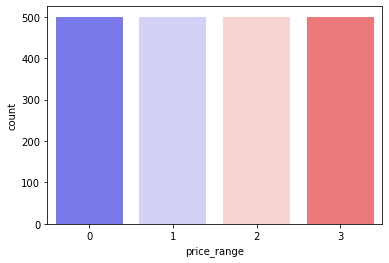

In [9]:
sns.countplot(x="price_range", data=df, palette="bwr")
plt.show()

dapat dilihat bajwa pada data untuk training kali ini kita menggunakan data yang sama rata sehingga program mampu melatih data dengan keluaran tertentu sama rata

pastikan data yang bisa dan tidak bisa diolah, data yang bisa diolah formatnya angka apabila bersifat string maka tidak bisa diolah 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

terlihat pada tampilan diatas tipe data yang kita gunakan semuanya bisa diolah tapi untuk mempercepat proses akan kita olah sebagian saja

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# tentukan yang mana akan dijadikan input dan target

In [12]:

X = df.iloc[:,0:20]
y = df.iloc[:,-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [13]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

#  Prapemrosesan : fitur seleksi

prapemrosesan data yang pertama adalah fitur seleksi disini kita akan mulai memisahkan mana input dan mana label sehingga Feature Selection atau Feature Reduction adalah suatu kegiatan yang umumnya bisa dilakukan secara preprocessing dan bertujuan untuk memilih feature yang berpengaruh dan mengesampingkan feature yang tidak berpengaruh dalam suatu kegiatan pemodelan atau penganalisaan data. Ada banyak alternatif yang bisa digunakan dan harus dicoba-coba untuk mencari yang cocok. Secara garis besar ada dua kelompok besar dalam pelaksanaan feature selection: Ranking Selection dan Subset Selection.

In [14]:
# Lets do some Feature Selection for better results and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

pertama adalah kbest yaitu kita menentukan features atau input mana yang paling berpengaruh dalam menentukan harga ponsel dan dengan menggunakan chisquare kita akan mengetahui data atau fitur tersebut berpengaruh atau tidak terhadap label

In [15]:
kbest = SelectKBest(chi2,k=10)
best_feaures = kbest.fit(X,y)
#kbest.fit digunakan untuk menjalankan fungsi score agar mendapat hasil yang sesuai

In [16]:
best_feaures.scores_
#data keluarannya adalah sebagai berikut

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [17]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([df_columns,df_features],axis=1)

In [19]:
featureScores.columns = ['Features','Score']

Selanjutnya kita ubah  data tersebut dalam bentuk tabel

In [20]:
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


dari sini dapat terlihat features yang paling berpengaruh dalam harga ponsel. kita akan mengambil 10 features yang paling mempengaruhi untuk melatih ann

In [21]:
X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]

In [22]:
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [23]:
X = X.values
y = y.values

kita masukkan nilai nilai dari X untuk dimasukkan ke variabel X menimpa data X yang lama

In [24]:
print(X.shape,y.shape)

(2000, 10) (2000,)


In [25]:
# lets do some normalisation and scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
y = y.reshape(-1,1)

fungsi reshape() diterapkan untuk memodifikasi dimensi dari matriks yang dihasilkan secara original ke dimensi yang diinginkan. Agar matrik bisa diolah, mereka harus memiliki dimensi yang sama.

In [27]:
# now convert y labels to one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

onehotencoder adalah suatu fungsi untuk meng-encode suatu label atau pengelompokan menjadi satu buah array Input ke transformator ini harus berupa bilangan bulat atau string seperti array, yang menunjukkan nilai yang diambil oleh fitur kategorikal (diskrit). setelah kita lakukan onehot encode label label tersebut akan berubah dalam bentuk biner

In [28]:
y = y.toarray()

In [29]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

## 2. Training ANN

## data split

In [36]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

Pada tahap ini kita membuat file test berukuran 20 % dari jumlah keseluruhan data yang tersedia.

In [146]:
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 28        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


Compiling classifier. Using adam optimizer. Using binary_crossentropy for loss function since classification is binary, i.e. only two classes 'M' or 'B'.

## Compile ANN

Kita akan mengcompile classifier dengan menggunakan adam optimizy. dan menggunakan categorical_crossentropy karena label kita lebih dari dua yaita 0,1,2,3

In [148]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [149]:
history = model.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Train on 1600 samples, validate on 400 samples
Epoch 1/105
1600/1600 [==============================] - 0s 180us/step - loss: 1.4738 - accuracy: 0.2675 - val_loss: 1.4595 - val_accuracy: 0.2825
Epoch 2/105
1600/1600 [==============================] - 0s 21us/step - loss: 1.3994 - accuracy: 0.2981 - val_loss: 1.4042 - val_accuracy: 0.2950
Epoch 3/105
1600/1600 [==============================] - 0s 21us/step - loss: 1.3515 - accuracy: 0.3375 - val_loss: 1.3640 - val_accuracy: 0.3150
Epoch 4/105
1600/1600 [==============================] - 0s 27us/step - loss: 1.3138 - accuracy: 0.3719 - val_loss: 1.3260 - val_accuracy: 0.3375
Epoch 5/105
1600/1600 [==============================] - 0s 24us/step - loss: 1.2759 - accuracy: 0.4125 - val_loss: 1.2880 - val_accuracy: 0.3700
Epoch 6/105
1600/1600 [==============================] - 0s 22us/step - loss: 1.2353 - accuracy: 0.4519 - val_loss: 1.2475 - val_accuracy: 0.4175
Epoch 7/105
1600/1600 [==============================] - 0s 21us/step - loss

Epoch 56/105
1600/1600 [==============================] - 0s 21us/step - loss: 0.1939 - accuracy: 0.9375 - val_loss: 0.2069 - val_accuracy: 0.9225
Epoch 57/105
1600/1600 [==============================] - 0s 17us/step - loss: 0.1890 - accuracy: 0.9431 - val_loss: 0.2010 - val_accuracy: 0.9275
Epoch 58/105
1600/1600 [==============================] - 0s 18us/step - loss: 0.1843 - accuracy: 0.9438 - val_loss: 0.1977 - val_accuracy: 0.9275
Epoch 59/105
1600/1600 [==============================] - 0s 17us/step - loss: 0.1800 - accuracy: 0.9450 - val_loss: 0.1933 - val_accuracy: 0.9275
Epoch 60/105
1600/1600 [==============================] - 0s 18us/step - loss: 0.1756 - accuracy: 0.9456 - val_loss: 0.1896 - val_accuracy: 0.9300
Epoch 61/105
1600/1600 [==============================] - 0s 17us/step - loss: 0.1717 - accuracy: 0.9488 - val_loss: 0.1847 - val_accuracy: 0.9300
Epoch 62/105
1600/1600 [==============================] - 0s 19us/step - loss: 0.1675 - accuracy: 0.9488 - val_loss: 0

## Simpan Model
agar bisa digunakan seterusnya ada baiknya kita menyimpan pemodelan ini

In [159]:
from keras.models import load_model

model.save('pengelompokan_data_harga_ponsel.h5') #Menyimpan Trained ANN 



apabila kita ingin memanggil model ini kembali kita gunakan perintah dibawah ini:
#classifier = load_model('pengelompokan_data_harga_ponsel.h5') 

selanjutnya kita masukkan hasil pengujicobaan 

# 3.  Melakukan pengetesan

In [161]:
y_pred = model.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

pada proses diatas kita memasukkan hasil akurasi prediksi ke dalam array yang satu pred[] dan kedua test[]

In [163]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Akurasi dari Model ini adalah = " + str(acc*100))

Akurasi dari Model ini adalah = 95.75


## Visualisasi Data
setelah dimasukkan dalam array kita masukkan keduar array tersebutdalam satu grafik yang sama dan kita bandingkan seberapa akurat prediksi dengan feature

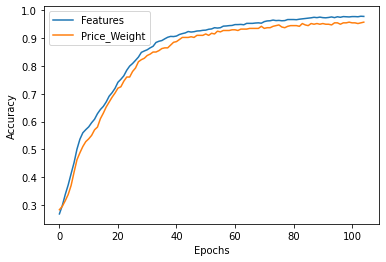

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

Dapat dilihat diatas adalah perbandingan antara features dan rentang harga yang kita lihat dari akurasi nya

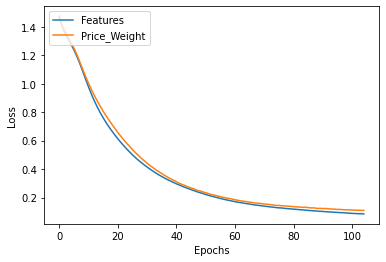

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

Dapat dilihat diatas adalah perbandingan antara features dan rentang harga yang kita lihat dari loss pada pengetesan

## Kesimpulan
dapat dilihat pada kedua grafik diatas kita kedua garis sudah cukup sama dan semakin banyak epoch yang dilakukan kualitas nya sudah cukup baik. 

In [ ]:
referensi 